In [33]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

* Carga de datos

In [34]:
df = pd.read_csv('../datasets/student_sleep_patterns.csv')
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


* Diccionario de datos
- Student_ID: Identificador único para cada estudiante (entero).
- Age: Edad del estudiante en años (entero).
- Gender: Género del estudiante (categórico: 'Masculino', 'Femenino', 'Otro').
- University_Year: Año actual del estudiante en la universidad (categórico: '1er Año', '2do Año', '3er Año', '4to Año').
- Sleep_Duration: Horas totales de sueño por noche (flotante).
- Study_Hours: Número promedio de horas dedicadas al estudio por día (flotante).
- Screen_Time: Número promedio de horas frente a pantallas (excluyendo estudio) por día (flotante).
- Caffeine_Intake: Número promedio de bebidas con cafeína consumidas por día (entero).
- Physical_Activity: Minutos promedio dedicados a la actividad física por día (entero).
- Sleep_Quality: Calificación subjetiva de la calidad del sueño en una escala de 1 a 10 (1 siendo la peor y 10 la mejor) (entero).
- Weekday_Sleep_Start: Hora en que el estudiante normalmente se duerme entre semana (flotante, en formato de 24 horas, por ejemplo, 23.00 es 11 PM).
- Weekend_Sleep_Start: Hora en que el estudiante normalmente se duerme los fines de semana (flotante, en formato de 24 horas).
- Weekday_Sleep_End: Hora en que el estudiante normalmente se despierta entre semana (flotante, en formato de 24 horas).
- Weekend_Sleep_End: Hora en que el estudiante normalmente se despierta los fines de semana (flotante, en formato de 24 horas).

* Estadisticas descriptivas

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,500.0,250.50000,144.481833,1.00,125.7500,250.500,375.2500,500.00
Age,500.0,21.53600,2.333150,18.00,20.0000,21.000,24.0000,25.00
Sleep_Duration,500.0,6.47240,1.485764,4.00,5.1000,6.500,7.8000,9.00
Study_Hours,500.0,5.98160,3.475725,0.10,2.9000,6.050,8.8000,12.00
Screen_Time,500.0,2.52500,0.859414,1.00,1.8000,2.600,3.3000,4.00
Caffeine_Intake,500.0,2.46200,1.682325,0.00,1.0000,2.000,4.0000,5.00
Physical_Activity,500.0,62.34200,35.191674,0.00,32.7500,62.500,93.2500,120.00
Sleep_Quality,500.0,5.36200,2.967249,1.00,3.0000,5.000,8.0000,10.00
Weekday_Sleep_Start,500.0,11.16686,5.972352,1.08,6.0875,10.635,16.1525,21.93
Weekend_Sleep_Start,500.0,12.37586,5.789611,2.05,7.2975,12.690,17.3275,22.00


* Normalizacion de variables

In [36]:
#Encode de variables categoricas

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['University_Year'] = label_encoder.fit_transform(df['University_Year'])

def convert_time_to_minutes(time):
    hours = int(time)
    minutes = (time - hours) * 60
    return hours * 60 + minutes

df['Weekday_Sleep_Start'] = df['Weekday_Sleep_Start'].apply(convert_time_to_minutes)
df['Weekend_Sleep_Start'] = df['Weekend_Sleep_Start'].apply(convert_time_to_minutes)
df['Weekday_Sleep_End'] = df['Weekday_Sleep_End'].apply(convert_time_to_minutes)
df['Weekend_Sleep_End'] = df['Weekend_Sleep_End'].apply(convert_time_to_minutes)

df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,2,1,7.7,7.9,3.4,2,37,10,849.6,243.0,444.6,423.6
1,2,21,1,0,6.3,6.0,1.9,5,74,2,523.8,426.0,492.6,612.6
2,3,22,1,3,5.1,6.7,3.9,5,53,5,1200.0,1228.2,412.8,655.2
3,4,24,2,3,6.3,8.6,2.8,4,55,9,1189.2,244.8,401.4,565.2
4,5,20,1,3,4.7,2.7,2.7,0,85,3,1258.8,367.2,538.8,540.6


* Verificacion de variables nulas

In [37]:
df.isnull().sum()

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

* EDA

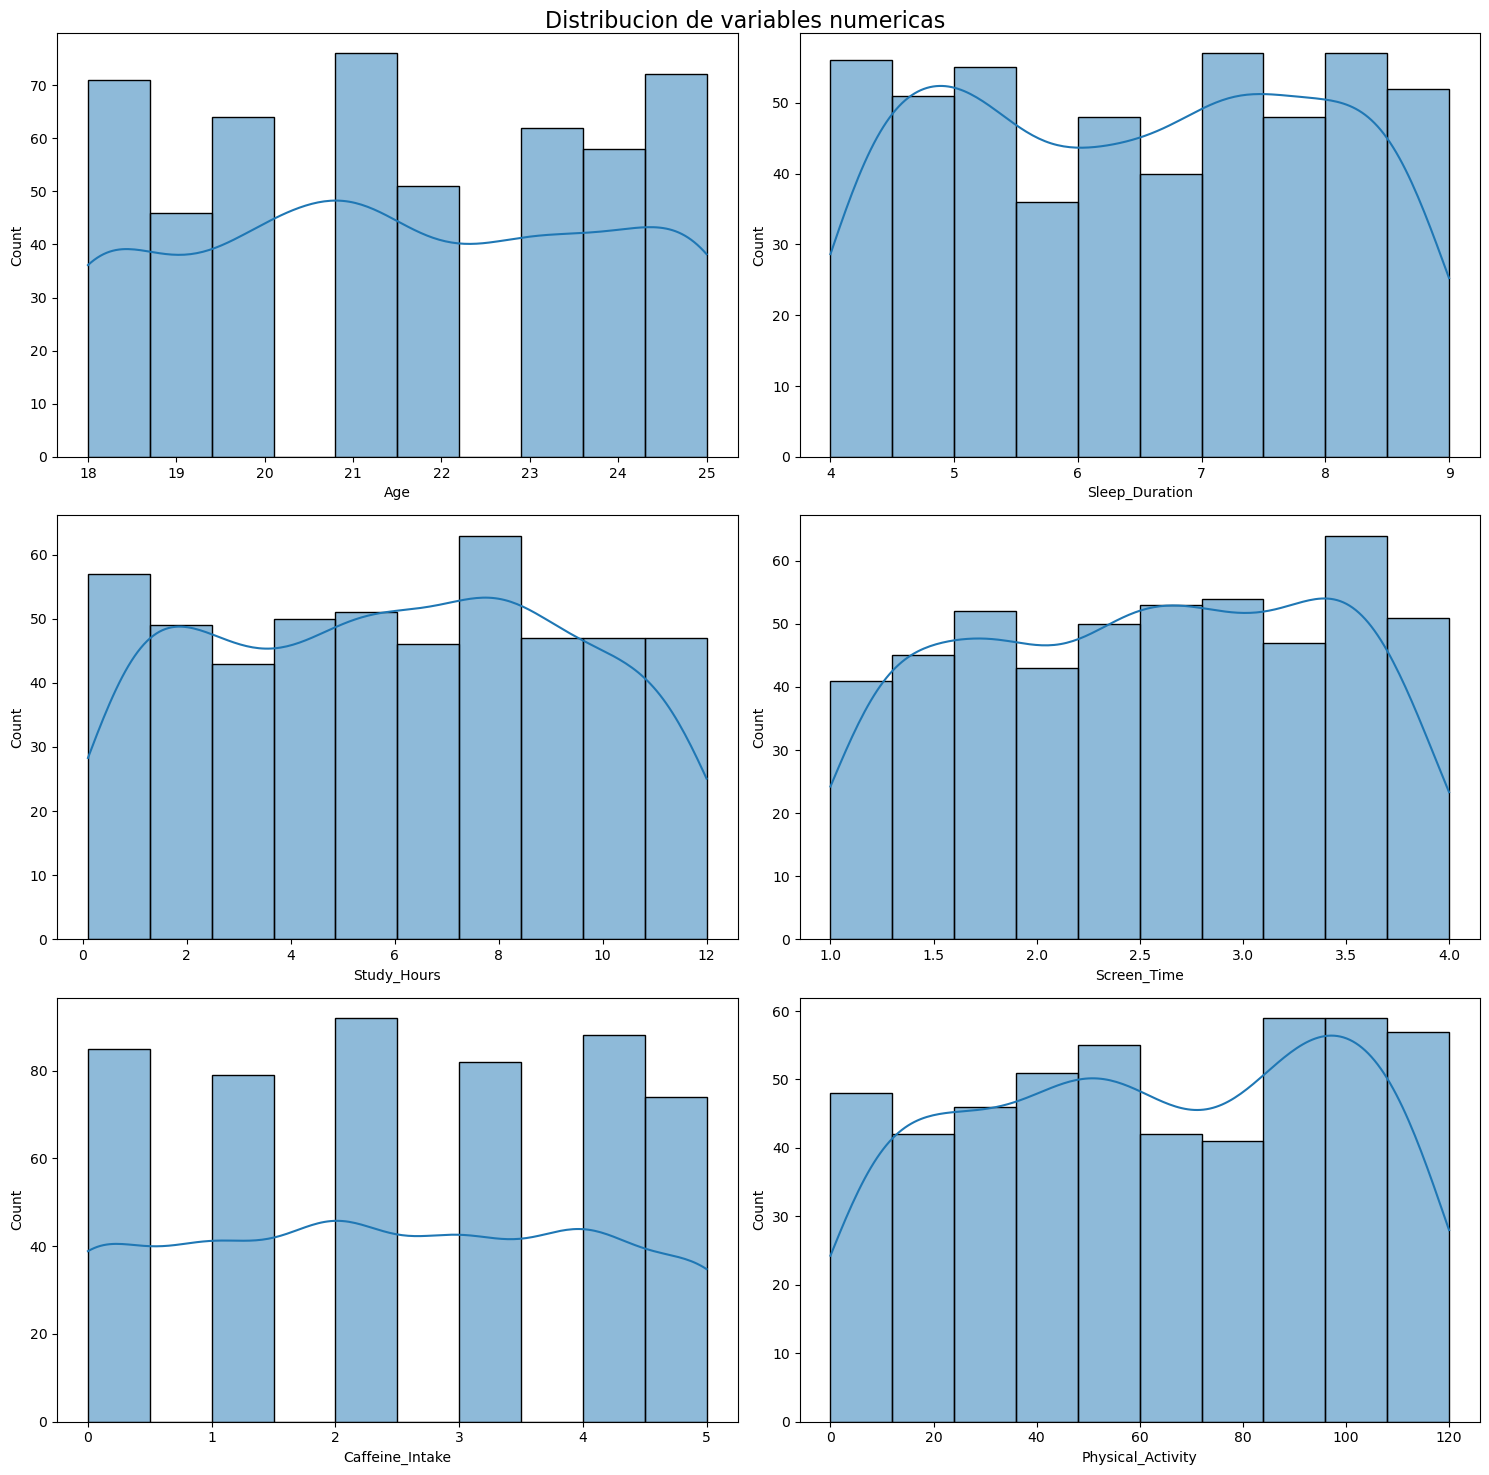

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df['Age'], ax=axes[0, 0], kde=True)
sns.histplot(df['Sleep_Duration'], ax=axes[0, 1], kde=True)
sns.histplot(df['Study_Hours'], ax=axes[1, 0], kde=True)
sns.histplot(df['Screen_Time'], ax=axes[1, 1], kde=True)
sns.histplot(df['Caffeine_Intake'], ax=axes[2, 0], kde=True)
sns.histplot(df['Physical_Activity'], ax=axes[2, 1], kde=True)

fig.suptitle('Distribucion de variables numericas', fontsize=16)
plt.tight_layout()
plt.show()

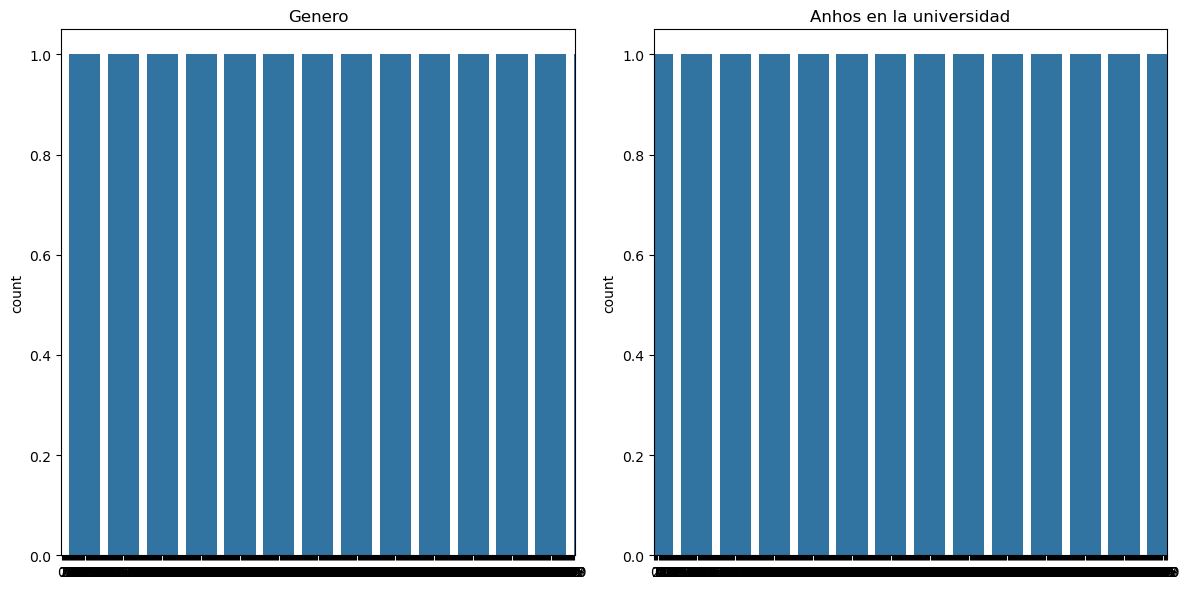

In [39]:
# Analisis de variables categoricas

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(df['Gender'], ax=ax[0])
sns.countplot(df['University_Year'], ax=ax[1])
ax[0].set_title('Genero')
ax[1].set_title('Anhos en la universidad')
plt.tight_layout()
plt.show()

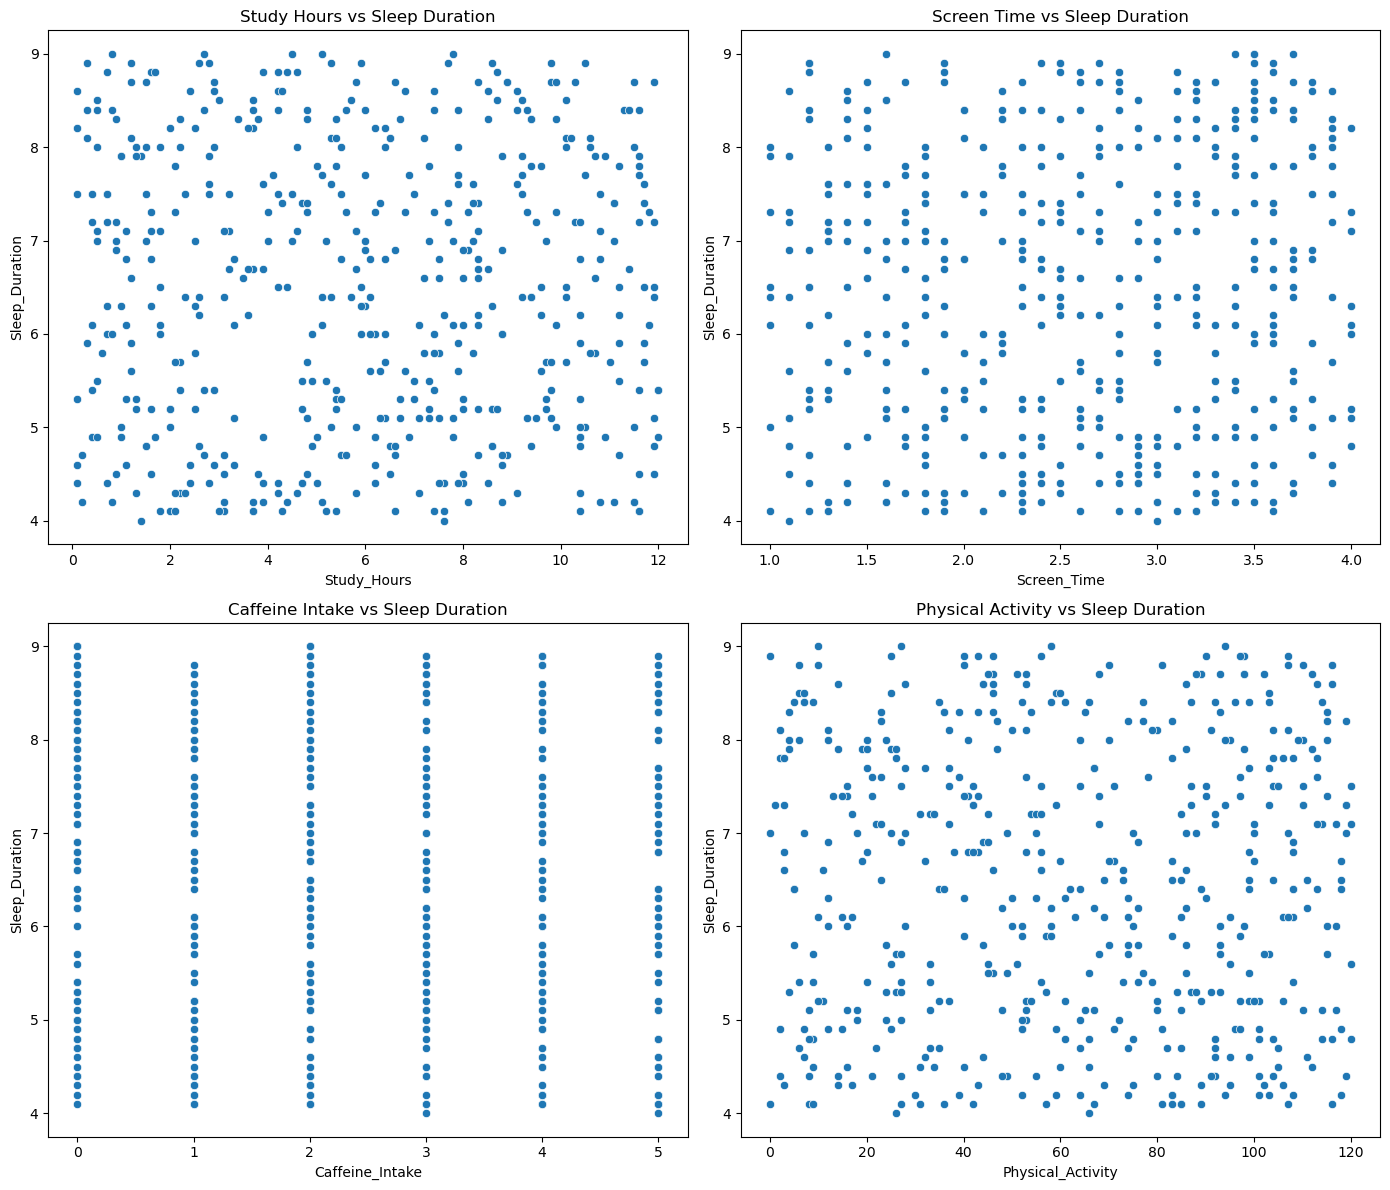

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.scatterplot(x='Study_Hours', y='Sleep_Duration', data=df, ax=axes[0, 0])
sns.scatterplot(x='Screen_Time', y='Sleep_Duration', data=df, ax=axes[0, 1])
sns.scatterplot(x='Caffeine_Intake', y='Sleep_Duration', data=df, ax=axes[1, 0])
sns.scatterplot(x='Physical_Activity', y='Sleep_Duration', data=df, ax=axes[1, 1])

axes[0, 0].set_title('Study Hours vs Sleep Duration')
axes[0, 1].set_title('Screen Time vs Sleep Duration')
axes[1, 0].set_title('Caffeine Intake vs Sleep Duration')
axes[1, 1].set_title('Physical Activity vs Sleep Duration')

plt.tight_layout()
plt.show()

* Matriz de correlacion

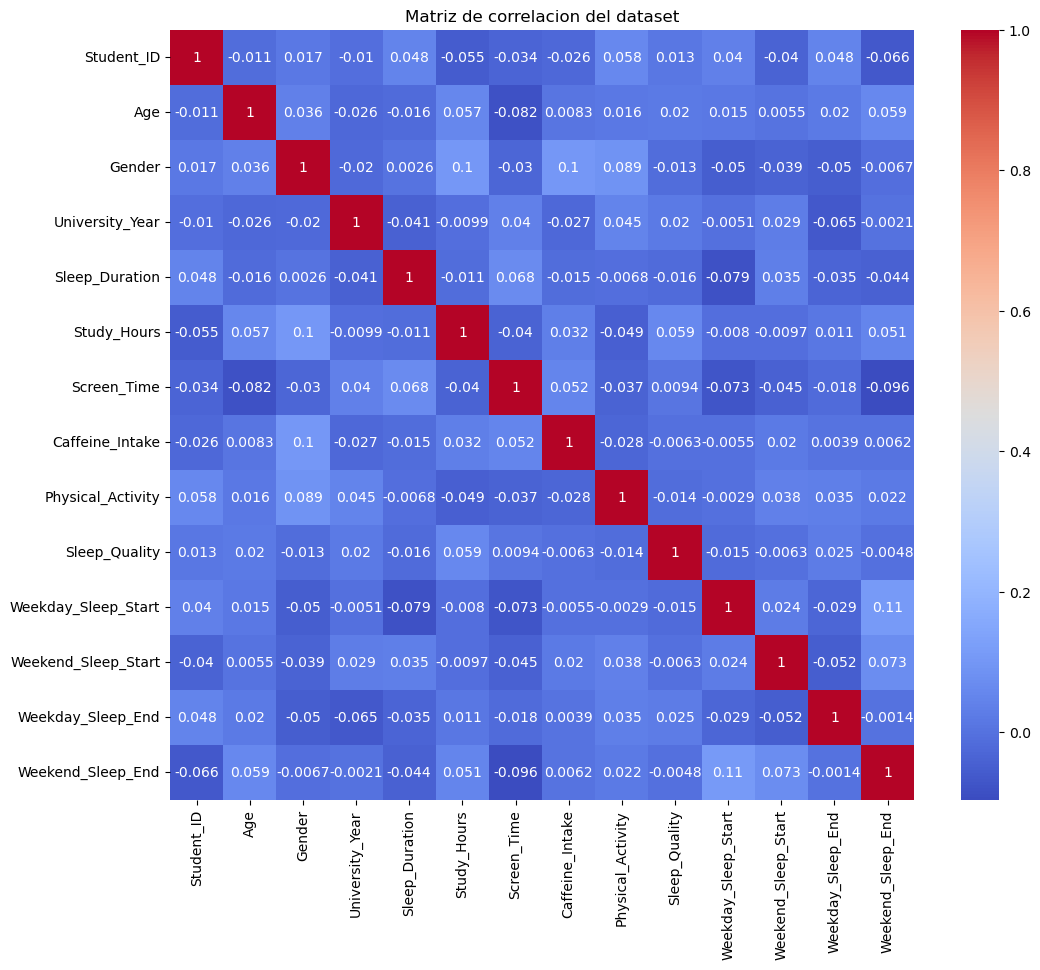

Correlacion entre duracion de suneho y horas de estudio: -0.011092416590548127
Correlacion entre tiempo frente a pantallas y calidad del suenho: 0.009410629326033452
Correlacion entre consumo de cafeina y calidad del suenho: -0.0062715127353048005


In [41]:

correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion del dataset')
plt.show()

# Checking specific correlations
print("Correlacion entre duracion de suneho y horas de estudio:", df['Sleep_Duration'].corr(df['Study_Hours']))
print("Correlacion entre tiempo frente a pantallas y calidad del suenho:", df['Screen_Time'].corr(df['Sleep_Quality']))
print("Correlacion entre consumo de cafeina y calidad del suenho:", df['Caffeine_Intake'].corr(df['Sleep_Quality']))

* De acuerdo a la matriz de correlacion, no se aprecian correlaciones fuertes entre las variables del dataset, 

* Caracteristicas del dataset
 - Datos Sintéticos: Los datos son sintéticos y pueden no reflejar perfectamente las complejidades de los patrones de sueño de los estudiantes en el mundo real.
 - Medidas Subjetivas: La calidad del sueño es una medida subjetiva, y la escala de calificación puede no captar toda la gama de experiencias relacionadas con el sueño.
 - Variables Limitadas: El conjunto de datos incluye un número limitado de variables, y otros factores (por ejemplo, niveles de estrés, dieta, trastornos del sueño) podrían influir en los patrones de sueño.

* Posibles investigaciones que se pueden realizar
 - ¿Cuál es la relación entre la duración del sueño y el desempeño académico (representado por las horas de estudio)?
 - ¿Cómo afecta el tiempo frente a pantallas la calidad y la duración del sueño?
 - ¿Existe una correlación entre el consumo de cafeína y los patrones de sueño?
 -¿Es posible construir un modelo predictivo para estimar la calidad del sueño en función de los factores relacionados con el estilo de vida?